# Lab 7 Exercises Solution - Logistic Regression, K-NN & Naive Bayes Classifier



The US adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K".

The goal here is to train the logistic regression, K-NN & Naive Bayes classifiers on the training dataset to predict the column `income_bracket` which has two possible values ">50K" and "<=50K" and compare the accuracy of each classifier with the test dataset.

Note that the dataset is made up of categorical and continuous features. It also contains missing values
The categorical columns are: `workclass, education, marital_status, occupation, relationship, race, gender, native_country`

The continuous columns are: `age, education_num, capital_gain, capital_loss, hours_per_week`

**Dataset columns**

```
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

income-bracket: <=50k, >50k
```

*Note: for the purposes of this exercise, fnlwgt (final weight, a value assigned by the census bureau as part of their sampling methodology of census data across the 51 states) can be dropped for simplicity*

**In this exercise we are going to use `%timeit` magic command to compare the runtime of the different algorithms together. We are going to use it once while building the model and once while scoring the model** 

The `%timeit` magic command is used measure the execution time of a piece of code. In order to use it, write the command just before the relevant of code, in the same line to measure the execution time.

It returns the mean and standard deviation of code run time calculated over `r` number of runs and `n` number of loops within each run (*it may return different results for each time you run the cell*).

<br/>
<br/>

Timeit Function: [Official Python Documentation - timeit function](https://docs.python.org/3/library/timeit.html)

%timeit Magic Command - Ipython: [ipython - timeit magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

Extra Links on %timeit Magic Command: [nkme - timeit magic command](https://note.nkmk.me/en/python-timeit-measure)

**Example**

In [62]:
%timeit [num for num in range(20)]

791 ns ± 2.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In the above example, the list comprehension was evaluated for 7 runs with each run having 1 million loops. This took an average of 791 nanoseconds with a standard deviation of 2.1 nanoseconds (*it may return different results for each time you run the cell*).

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

In [64]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading & Cleaning

**Dataset Loading**

Make sure the datasets have been loaded correctly. You may want to have a look at the [pd.read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to resolve dataset loading issues.

In [65]:
try:
    df = pd.read_csv('census_income.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/census_income.csv')    
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income_bracket  48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Check the unique values for each categorical attribute**

In [67]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital_status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex: ['Male' 'Female']

native_country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'Eng

**Handle inconsistencies and missing values**

In [68]:
# Because we want to replace a substring
# we use {Series}.str.replace
df['income_bracket'] = df['income_bracket'].str.replace('.', '', regex=False)
df['income_bracket'].unique()

array(['<=50K', '>50K'], dtype=object)

In [69]:
# The '?' missing value indicator can be specified when loading the dataset using the na_values parameter
# (assuming that there are no inconsistent whitespaces); code:
# df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/census_income.csv', na_values='?')

# Alternatively, we can perform this change after loading the dataset.
# We'll strip any extra whitespaces from both ends of the string (just in case),
# and replace the '?' character with the null indicator np.NaN
for col in df.select_dtypes(object).columns:
    df[col] = df[col].str.strip()
    # Because we want to replace a value with another value,
    # we use {DataFrame/Series}.replace (notice how we didn't use the .str accessor)
    # This is equivalent to writing:
    # df.loc[df[col] == '?', col] = np.NaN
    df[col] = df[col].replace('?', np.NaN, regex=False)

In [70]:
# alternative one-line solution that applies this over each column
#df = df.transform(lambda x: x.str.strip().replace('?', np.NaN, regex=False) if x.dtype == 'object' else x)

In [71]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_bracket       0
dtype: int64

In [72]:
df.isnull().sum() / len(df) * 100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.754637
income_bracket    0.000000
dtype: float64

In [73]:
# since there are few records with null values,
# we can drop them from the dataset
df = df.dropna()
df.dropna().isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

For the sake of simplicty, we won't be using the fnlwgt attribute

**Drop the fnlwgt attribute from the dataset**

In [74]:
# We'll also drop education_num (since that's just mapping education's values)
df = df.drop(['fnlwgt', 'education_num'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   marital_status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   sex             45222 non-null  object
 8   capital_gain    45222 non-null  int64 
 9   capital_loss    45222 non-null  int64 
 10  hours_per_week  45222 non-null  int64 
 11  native_country  45222 non-null  object
 12  income_bracket  45222 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


## Exploratory Data Analysis

**Q: Does education have an impact on a person's income bracket?**

*Hint: see lab 6 for an example of plotting a categorical attribute against a binary attribute.*

In [75]:
# Since the less than (<) sign comes before the greater than sign (>)
# We won't need to manually map each value and can just let pandas handle the conversion
# This allows seaborn to numerically calculate the percentage of employees who earn >=50k for the barplot
# (Since >50k is 1, and <=50k is 0)
df['income_bracket'] = df['income_bracket'].astype('category').cat.codes

In [76]:
df['income_bracket']

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income_bracket, Length: 45222, dtype: int8

In [77]:
# Checking for the distrubution of the income classes

print(df['income_bracket'].value_counts())
print('----------------------------------------------------------------')
print(df['income_bracket'].value_counts()/ df['income_bracket'].count())

0    34014
1    11208
Name: income_bracket, dtype: int64
----------------------------------------------------------------
0    0.752156
1    0.247844
Name: income_bracket, dtype: float64


In [78]:
# Optional ordering
order = df[['education', 'income_bracket']].groupby('education').mean().sort_values('income_bracket').index
order

Index(['Preschool', '1st-4th', '5th-6th', '11th', '9th', '7th-8th', '10th',
       '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm',
       'Bachelors', 'Masters', 'Doctorate', 'Prof-school'],
      dtype='object', name='education')

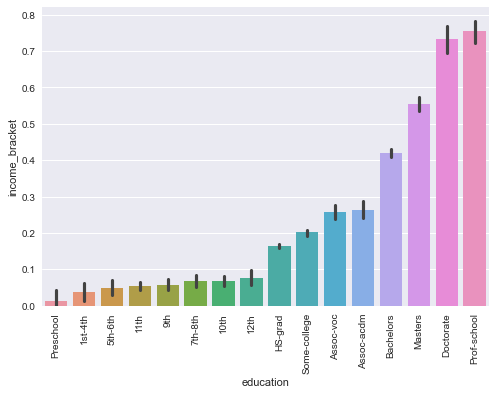

In [79]:
ax = sns.barplot(x='education', y='income_bracket', data=df, order=order);
# rotate the axis tick labels for clarity (otherwise they would overlap)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## Data Preprocessing

**Encode the categorical columns using an appropriate strategy**

In [80]:
Categorical_columns = df.select_dtypes(object).columns
Categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [81]:
# Label Encoding
# the only column which will be label encoded is the Education column as the categories in it are ordinal

df_encoded = df.copy()
df_encoded['education'] = df_encoded['education'].astype('category').cat.codes
df_encoded

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,9,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,11,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,1,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,9,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,9,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48839,38,Private,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,9,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [82]:
Categorical_columns = df.select_dtypes(object).columns
Categorical_columns = Categorical_columns.drop('education')
Categorical_columns

Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'native_country'],
      dtype='object')

In [83]:
# One-Hot Encoding
# One-hot encoding is a better choice for the remaining nominal categories

df_encoded = pd.get_dummies(df_encoded, columns=Categorical_columns)
df_encoded

,age,education,capital_gain,capital_loss,hours_per_week,income_bracket,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,9,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48837,39,9,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,44,9,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        45222 non-null  int64
 1   education                                  45222 non-null  int8 
 2   capital_gain                               45222 non-null  int64
 3   capital_loss                               45222 non-null  int64
 4   hours_per_week                             45222 non-null  int64
 5   income_bracket                             45222 non-null  int8 
 6   workclass_Federal-gov                      45222 non-null  uint8
 7   workclass_Local-gov                        45222 non-null  uint8
 8   workclass_Private                          45222 non-null  uint8
 9   workclass_Self-emp-inc                     45222 non-null  uint8
 10  workclass_Self-emp-not-inc                 452

**Apply Normalization on the numerical Columns**

in order for logistic regression to converge, we need to normalize numeric columns or increase the maximum number of iterations of the logistic regression model. In this example we incresed the maximum number of iterations.

In [85]:
# Applying min-max Normalization on the numerical columns

# numerical_columns = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']

# df_encoded[numerical_columns] = ( 
    
#    df_encoded[numerical_columns] - df_encoded[numerical_columns].min()  
    
#) /( 
    
#    df_encoded[numerical_columns].max() - df_encoded[numerical_columns].min()
#)

#df_encoded.head()


## Modelling

**Split the data into training and testing sets, and then train the Logistic Regression, K-NN, and Naive Bayes Classifiers on the training set** (Use %timeit when building the model)

[Scikit-learn API Reference](https://scikit-learn.org/stable/modules/classes.html)

In [86]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('income_bracket', axis=1)
y = df_encoded['income_bracket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Please note that, for this dataset you need to set the `max_iter` attribute of logistic regression to at least `2000` so that the model will be able converge, meaning that it could find a local optimal solution.**

Logistic regression fails to converge with this dataset if we run it for too few iterations. It could also be that the dataset is not linearly separable. Since this is a linear model, validation techinques like the ones used in lab 5 can be used.The logistic regression model is an iterative algorithm that is fitted in multiple iterations. It might not converge properly if the input variables are not normalized properly. In this case, it needs more iterations to be able to converge and find a solution.

So, you can set `max_iter` attribute of logistic regression to a larger value. The default is `1000`. This should be your last resort. So, if the algorithm does not converge within the first 1000 iterations, you need to set the `max_iter` to a larger value.


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr_model = LogisticRegression( max_iter = 2000 )
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

# we increased the maximum number of iterations for Logistic regression to converge with this dataset

**Use the `timeit` magic command.**

The `timeit` magic command is used to measure the execution time for the small python code snippets. This command runs the code a million times (by default) to get the most precise value for the code execution time​.

It returns the mean and standard deviation of code run time calculated over `r` number of runs and `n` number of loops within each run (*it may return different results for each time you run the cell*).

In [88]:
# Logistic Regression

%timeit lr_model.fit(X_train, y_train)

7.08 s ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
# K-nearst Neighbors Classifier

%timeit knn_model.fit(X_train, y_train)

1.94 s ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In the above example, the KNN model building was evaluated for 7 runs with each run having 1 loop. This took an average of 1.94 seconds with a standard deviation of 3.25 milliseconds.

Note that the `kNN` model was the fastest one to get trained.

In [90]:
# Gaussian Naive Bayes

%timeit nb_model.fit(X_train, y_train)

68.3 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Evaluation

**Evaluate each model using their built-in `score` function to get them evaluated based on the `accuracy` metric**

**Use `%timeit` when scoring the model**

`score` outputs the accuracy score of each model. 

Since we have two classes with equal importance and the dataset is somehow balanced (75% <=50k and 25% >50k), we'll use accuracy as our measure.

In [91]:
# Logistic Regression accuarcy

lr_model.score(X_test, y_test)

0.8441070243974349

In [92]:
# Logistic Regression scoring execution time

%timeit lr_model.score(X_test, y_test)

13.2 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [93]:
# K-nearst Neighbors Classifier accuarcy

knn_model.score(X_test, y_test)

0.8404953195253188

In [94]:
# K-nearst Neighbors Classifier scoring execution time

%timeit knn_model.score(X_test, y_test)

7.15 s ± 50.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
# Gaussian Naive Bayes accuarcy

nb_model.score(X_test, y_test)

0.7848455811896513

In [96]:
# Gaussian Naive Bayes scoring execution time

%timeit nb_model.score(X_test, y_test)

36 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Commenting on Evaluation**

`kNN` is a type of instance-based learning (Lazy Learners) where no model is
created; the `kNN` algorithm builds a case repository instead and all computations are delayed until prediction therefore, `kNN` requires the longest time in scoring.

In this case, the `Logestic Regression` model performs the best, where it is 84.4% accurate. On the other hand, `kNN` and `Guassian Naive Bayes` models showed lower accuracy (84% and 78% respectively). Note that we used the default hyperparameters for each model however, so we can use cross-validation in order to try out different parameters and then finally evaluate using the testing dataset. 

Also, it would be better to check for the correlation matrix before applying the `Logestic Regression` model to avoid multicollinearity and overfitting

## References

Dataset source: https://archive.ics.uci.edu/ml/datasets/census+income